In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch

from agm import calibrateAnalyticGaussianMechanism
from matplotlib import cm

%matplotlib inline

# set random seed
np.random.seed(1)
torch.manual_seed(1)

In [2]:
# no. experiments, no. samples, dim, X
ne = 10
ns = 500
d  = 5

In [3]:
# vectors for generating T
# T = exp(-T_w^T X + b)
T_w = torch.tensor([0.5,0.4,0.3,0.2,0.1], dtype=torch.float64).reshape((-1, 1))
T_b = 0 # 0.05

In [4]:
# privacy parameters
epses = [0.5]
delta = 1. / (ns ** 2)

# regularisation coefficient
reg_co = 0.1

# splits
n_splits = 2

In [5]:
def ln_mu(nu, sigma_2):
    return torch.exp(nu + (sigma_2 / 2))

def ln_var(nu, sigma_2):
    return (torch.exp(sigma_2) - 1) * torch.exp((2 * nu) + sigma_2)

In [9]:
epses = [0.2, 0.35, 0.5, 0.65, 0.8, 0.95]
delta = 1. / (ns ** 2)

nu = T_w.norm()

out_mu = {}
out_var = {}

for eps in epses:
    s_a = 2. / (ns / 2 * reg_co)
    sigma = calibrateAnalyticGaussianMechanism(eps, delta, s_a)
    sigma_2 = sigma ** 2
    print(sigma_2)
    out_mu_, out_var_ = [], []
    steps_ = []
    for i in torch.arange(0, sigma_2, 0.01):
        out_mu_.append(ln_mu(nu, i))
        out_var_.append(ln_var(nu, i))
        steps_.append(i)
    out_mu[eps] = (steps_, out_mu_)
    out_var[eps] = (steps_, out_var_)
    
print(sigma_2)

1.9389608660251727
0.6877803168979582
0.3553993001322342
0.21884493086726525
0.14921705343514022
0.10876184389702706
0.10876184389702706


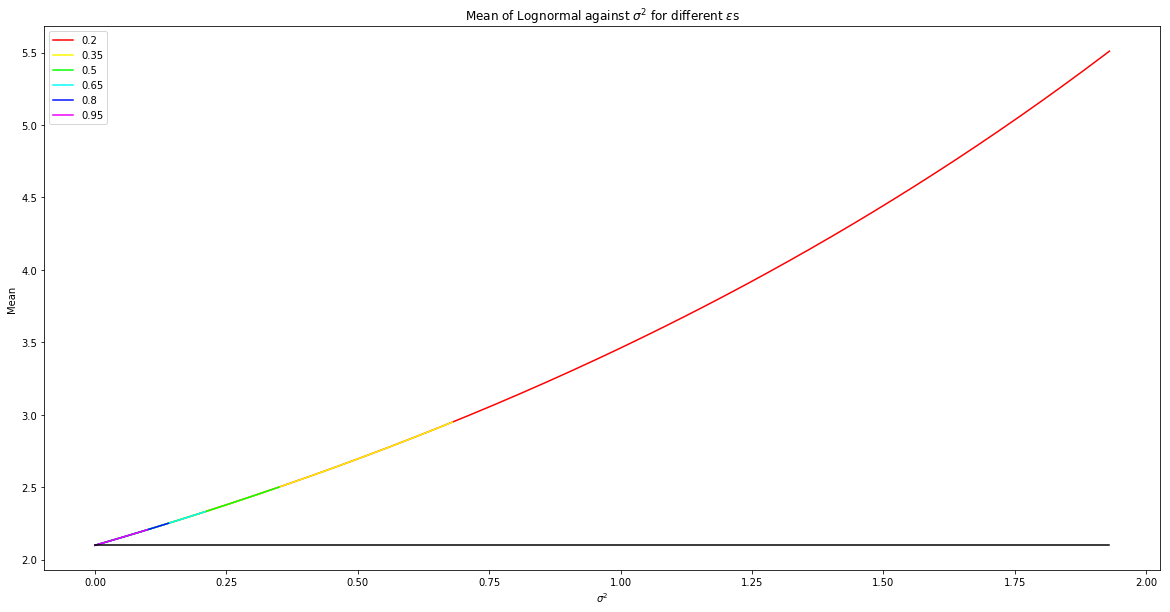

In [7]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))
col_map = plt.cm.get_cmap('hsv')
    
for i in range(len(epses)):
    col = col_map(i / len(epses))
    ax.plot(out_mu[epses[i]][0], out_mu[epses[i]][1], color=col, label=str(epses[i]))
#     ax.plot((out_mu[epses[i]][0][-1], out_mu[epses[i]][0][-1]), (0, out_mu[epses[i]][1][-1]), color=col)
ax.plot(out_mu[0.2][0], [torch.exp(nu)] * len(out_mu[0.2][0]), color='k')
    
ax.set_xlabel('$\sigma^2$')
ax.set_ylabel('Mean')
ax.set_title('Mean of Lognormal against $\sigma^2$ for different $\epsilon$s')
ax.legend()

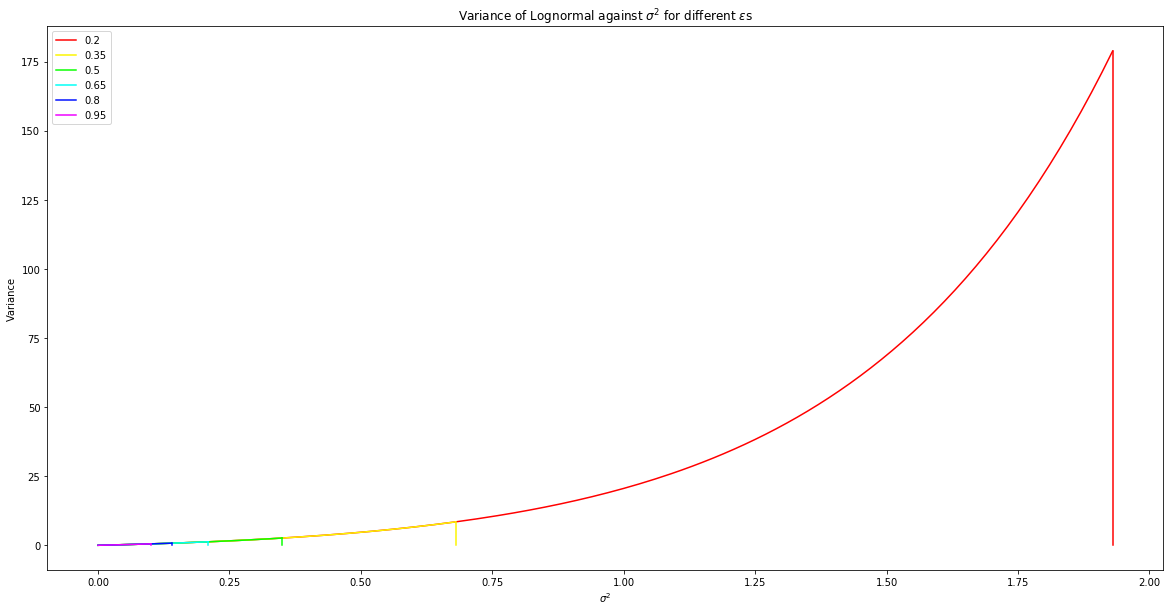

In [8]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))
col_map = plt.cm.get_cmap('hsv')
    
for i in range(len(epses)):
    col = col_map(i / len(epses))
    ax.plot(out_var[epses[i]][0], out_var[epses[i]][1], color=col, label=str(epses[i]))
    ax.plot((out_var[epses[i]][0][-1], out_var[epses[i]][0][-1]), (0, out_var[epses[i]][1][-1]), color=col)
    
ax.set_xlabel('$\sigma^2$')
ax.set_ylabel('Variance')
ax.set_title('Variance of Lognormal against $\sigma^2$ for different $\epsilon$s')
ax.legend()